In [23]:
import sklearn
import nltk
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd
import re

In [7]:
from data import texts1 as texts
pprint(texts)

['Penny bought bright blue fishes.',
 'Penny bought bright blue and orange fish.',
 'The cat ate a fish at the store.',
 'Penny went to the store. Penny ate a bug. Penny saw a fish.',
 'It meowed once at the bug, it is still meowing at the bug and the fish',
 'The cat is at the fish store. The cat is orange. The cat is meowing at the '
 'fish.',
 'Penny is a fish']


In [45]:
count_vec = CountVectorizer(stop_words="english")
x = count_vec.fit_transform(texts)
pd.DataFrame(x.toarray(),columns=count_vec.get_feature_names())

ate  blue  bought  bowl  bright  bug  bugs  cat  cats  closed  ...   \
0     0     1       1     0       1    0     0    0     0       0  ...    
1     0     1       1     1       1    0     0    0     0       0  ...    
2     1     0       0     0       0    0     0    1     0       0  ...    
3     1     0       0     0       0    1     0    0     0       0  ...    
4     0     0       0     0       0    2     0    0     0       0  ...    
5     0     0       0     0       0    0     0    3     0       0  ...    
6     0     0       0     0       0    0     0    0     0       0  ...    
7     0     0       0     0       0    0     0    1     0       0  ...    
8     0     0       0     0       0    0     0    0     0       1  ...    
9     0     0       0     0       0    0     0    0     0       0  ...    
10    0     0       0     0       0    0     1    0     1       0  ...    

    loves  meowed  meowing  old  orange  penny  saw  store  tree  went  
0       0       0        0    0       0      1    0      0     0     0  
1       0       0        0    0       1      1    0      0     0     0  
2       0       0        0    0       0      0    0      1     0     0  
3       0       0        0    0       0      3    1      1     0     1  
4       0       1        1    0       0      0    0      0     0     0  
5       0       0        1    0       1      0    0      1     0     0  
6       0       0        0    0       0      1    0      0     0     0  
7       1       0        0    0       0      4    0      0     0     0  
8       0       0        0    0       0      0    0      1     0     0  
9       0       0        0    1       0      0    0      0     1     0  
10      0       0        0    0       0      0    0      0     0     0  

[11 rows x 23 columns]

In [46]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemmming_tokenizer(text):
    words = re.sub(r'[^A-Za-z0-9\-]'," ",text).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words
    
count_vec = CountVectorizer(stop_words="english",tokenizer=stemmming_tokenizer)
x = count_vec.fit_transform(texts)
pd.DataFrame(x.toarray(),columns=count_vec.get_feature_names())

ate  blue  bought  bowl  bright  bug  cat  close  eat  fish  ...   meow  \
0     0     1       1     0       1    0    0      0    0     1  ...      0   
1     0     1       1     1       1    0    0      0    0     0  ...      0   
2     1     0       0     0       0    0    1      0    0     1  ...      0   
3     1     0       0     0       0    1    0      0    0     1  ...      0   
4     0     0       0     0       0    2    0      0    0     1  ...      2   
5     0     0       0     0       0    0    3      0    0     2  ...      1   
6     0     0       0     0       0    0    0      0    0     1  ...      0   
7     0     0       0     0       0    0    1      0    0     1  ...      0   
8     0     0       0     0       0    0    0      1    0     0  ...      0   
9     0     0       0     0       0    0    0      0    0     0  ...      0   
10    0     0       0     0       0    1    1      0    3     1  ...      0   

    old  onc  onli  orang  penni  saw  store  tree  went  
0     0    0     0      0      1    0      0     0     0  
1     0    0     0      1      1    0      0     0     0  
2     0    0     0      0      0    0      1     0     0  
3     0    0     0      0      3    1      1     0     1  
4     0    1     0      0      0    0      0     0     0  
5     0    0     0      1      0    0      1     0     0  
6     0    0     0      0      1    0      0     0     0  
7     0    0     0      0      4    0      0     0     0  
8     0    0     0      0      0    0      1     0     0  
9     1    0     0      0      0    0      0     1     0  
10    0    0     1      0      0    0      0     0     0  

[11 rows x 21 columns]

In [47]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english",tokenizer=stemmming_tokenizer,use_idf=True,norm="l2")
x = tfidf_vectorizer.fit_transform(texts)
pd.DataFrame(x.toarray(),columns=count_vec.get_feature_names())

ate      blue    bought      bowl    bright       bug       cat  \
0   0.000000  0.513353  0.513353  0.000000  0.513353  0.000000  0.000000   
1   0.000000  0.412669  0.412669  0.482788  0.412669  0.000000  0.000000   
2   0.629121  0.000000  0.000000  0.000000  0.000000  0.000000  0.494448   
3   0.317012  0.000000  0.000000  0.000000  0.000000  0.278794  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.594491  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.771428   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.244502   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.224327  0.200474   

       close       eat      fish    ...         meow       old       onc  \
0   0.000000  0.000000  0.277013    ...     0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.339484    ...     0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.171065    ...     0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.182386    ...     0.675985  0.000000  0.395422   
5   0.000000  0.000000  0.353104    ...     0.327181  0.000000  0.000000   
6   0.000000  0.000000  0.605349    ...     0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.167873    ...     0.000000  0.000000  0.000000   
8   0.830083  0.000000  0.000000    ...     0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000    ...     0.000000  0.707107  0.000000   
10  0.000000  0.895258  0.137644    ...     0.000000  0.000000  0.000000   

        onli     orang     penni       saw     store      tree      went  
0   0.000000  0.000000  0.364239  0.000000  0.000000  0.000000  0.000000  
1   0.000000  0.412669  0.292801  0.000000  0.000000  0.000000  0.000000  
2   0.000000  0.000000  0.000000  0.000000  0.494448  0.000000  0.000000  
3   0.000000  0.000000  0.674788  0.370877  0.249150  0.000000  0.370877  
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5   0.000000  0.327181  0.000000  0.000000  0.257143  0.000000  0.000000  
6   0.000000  0.000000  0.795961  0.000000  0.000000  0.000000  0.000000  
7   0.000000  0.000000  0.882934  0.000000  0.000000  0.000000  0.000000  
8   0.000000  0.000000  0.000000  0.000000  0.557639  0.000000  0.000000  
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.707107  0.000000  
10  0.298419  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[11 rows x 21 columns]

In [31]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
results = pd.DataFrame()
results['text']=texts
results['category']=km.labels_
results

text  category
0                   Penny bought bright blue fishes.         2
1          Penny bought bright blue and orange fish.         2
2                   The cat ate a fish at the store.         1
3  Penny went to the store. Penny ate a bug. Penn...         0
4  It meowed once at the bug, it is still meowing...         0
5  The cat is at the fish store. The cat is orang...         1
6                                    Penny is a fish         0

In [35]:
from data import texts2 as texts
tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_features=2,tokenizer=stemmming_tokenizer,use_idf=True,norm="l2")
x = tfidf_vectorizer.fit_transform(texts)
pd.DataFrame(x.toarray(),columns=count_vec.get_feature_names())

ValueError: Shape of passed values is (2, 11), indices imply (14, 11)

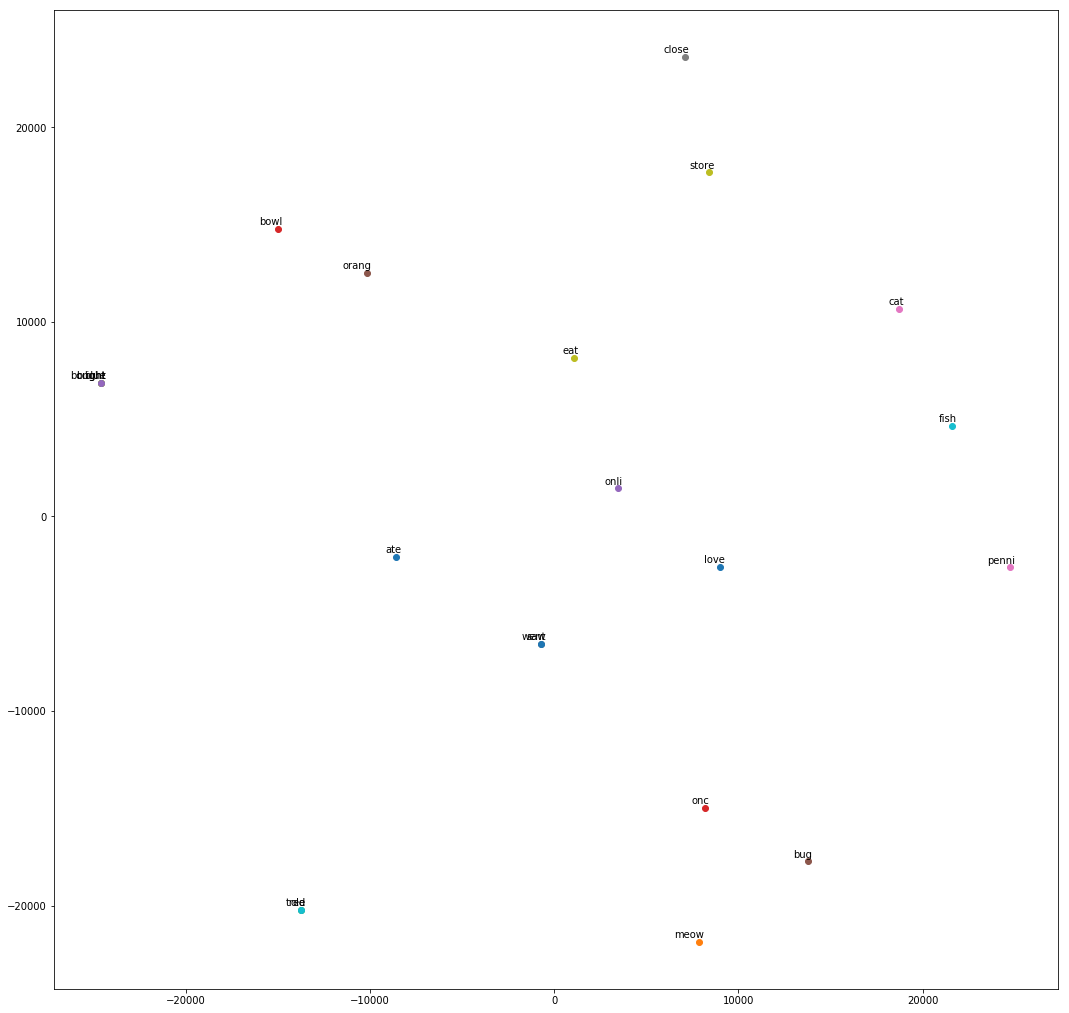

In [61]:
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=5.0, n_components=2, init='pca', n_iter=10000)

low_dim_embedding = tsne.fit_transform(x.transpose().toarray())

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, count_vec.get_feature_names())

In [53]:
x.transpose()

<21x11 sparse matrix of type '<class 'numpy.float64'>'
	with 46 stored elements in Compressed Sparse Column format>

# Nadzirano učenje

In [51]:
#feature extractor
def gender_features(word):
    return {'last_letter':word[-1],'last2letters':word[-2:]}
#gender_features("Shrek")

In [52]:
#Učitajmo podatke zajedno s oznakama

from nltk.corpus import names
import random
Names = ([(name,'male') for name in names.words('male.txt')]+[(name,'female') for name in names.words('female.txt')])
random.shuffle(Names)

In [53]:
#len([(name,'female') for name in names.words('female.txt')])

In [54]:
features = [(gender_features(n),g) for (n,g) in Names]

In [55]:
import nltk
train_set,test_set = features[500:],features[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [57]:
print(classifier.classify(gender_features("Iwan")))
print(classifier.classify(gender_features("Ivan")))
print(classifier.classify(gender_features("Bartol")))
print(classifier.classify(gender_features("Iva")))
print(classifier.classify(gender_features("Domagoj")))
print(classifier.classify(gender_features("Ana")))
print(classifier.classify(gender_features("Tomislav")))
print(classifier.classify(gender_features("Duje")))
print(classifier.classify(gender_features("Mitar")))

print(nltk.classify.accuracy(classifier,test_set))
classifier.show_most_informative_features()

male
male
male
female
male
female
male
female
male
0.75
Most Informative Features
            last2letters = 'na'           female : male   =    101.2 : 1.0
            last2letters = 'ia'           female : male   =     94.9 : 1.0
            last2letters = 'la'           female : male   =     76.8 : 1.0
            last2letters = 'ld'             male : female =     39.3 : 1.0
             last_letter = 'a'            female : male   =     38.9 : 1.0
            last2letters = 'sa'           female : male   =     37.1 : 1.0
            last2letters = 'ta'           female : male   =     32.2 : 1.0
             last_letter = 'k'              male : female =     31.7 : 1.0
             last_letter = 'f'              male : female =     28.8 : 1.0
            last2letters = 'us'             male : female =     28.7 : 1.0


Overfitting vs Underfitting

In [71]:
train_names = Names[1500:]
val_names = Names[500:1500]
test_names = Names[:500]
train_set = [(gender_features(n),g) for (n,g) in train_names]
val_set = [(gender_features(n),g) for (n,g) in val_names]
test_set = [(gender_features(n),g) for (n,g) in test_names]

In [81]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
#analiza greške
print(nltk.classify.accuracy(classifier,val_set))
errors = []
for (name,tag) in val_names:
    guess = classifier.classify(gender_features(name))
    #print(guess,tag)
    if guess.strip()!=tag.strip():
        #print(guess,tag)
        errors.append((tag,guess,name))
for (tag,guess,name) in sorted(errors):
    print('correct=%-8s guess=%-8s name=%-30s'%(tag,guess,name))
print(classifier.classify(gender_features("Kathleen")))

0.787
correct=female   guess=male     name=Adey                          
correct=female   guess=male     name=Alis                          
correct=female   guess=male     name=Ardath                        
correct=female   guess=male     name=Arden                         
correct=female   guess=male     name=Ashlen                        
correct=female   guess=male     name=Audrey                        
correct=female   guess=male     name=Avis                          
correct=female   guess=male     name=Beau                          
correct=female   guess=male     name=Blanch                        
correct=female   guess=male     name=Bo                            
correct=female   guess=male     name=Brandais                      
correct=female   guess=male     name=Briney                        
correct=female   guess=male     name=Carlin                        
correct=female   guess=male     name=Carol-Jean                    
correct=female   guess=male     name=Carol

In [78]:
len(errors)

213